# Importing Libraries

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

# Import Data

In [23]:
import pandas as pd
data = pd.read_csv('C:/Users/User/Desktop/Streamlit Web App/hmnist_28_28_RGB.csv')
data.head()



pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [24]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [25]:
tabular_data = pd.read_csv('C:/Users/User/Desktop/Streamlit Web App/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [26]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

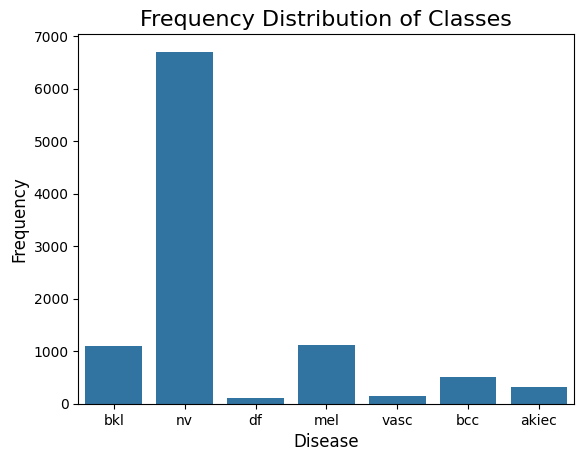

In [27]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

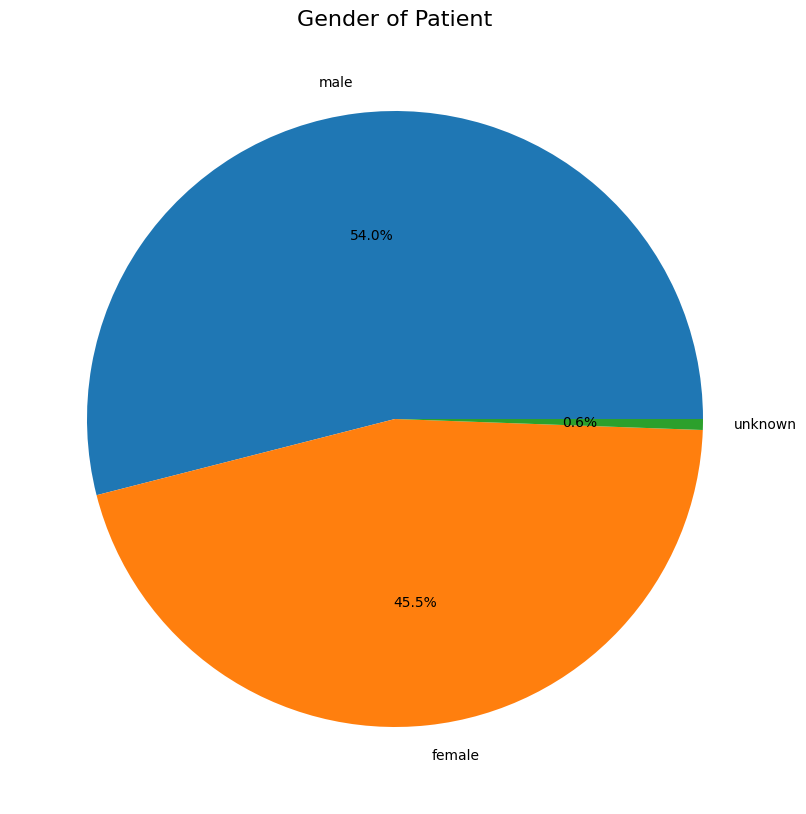

In [28]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

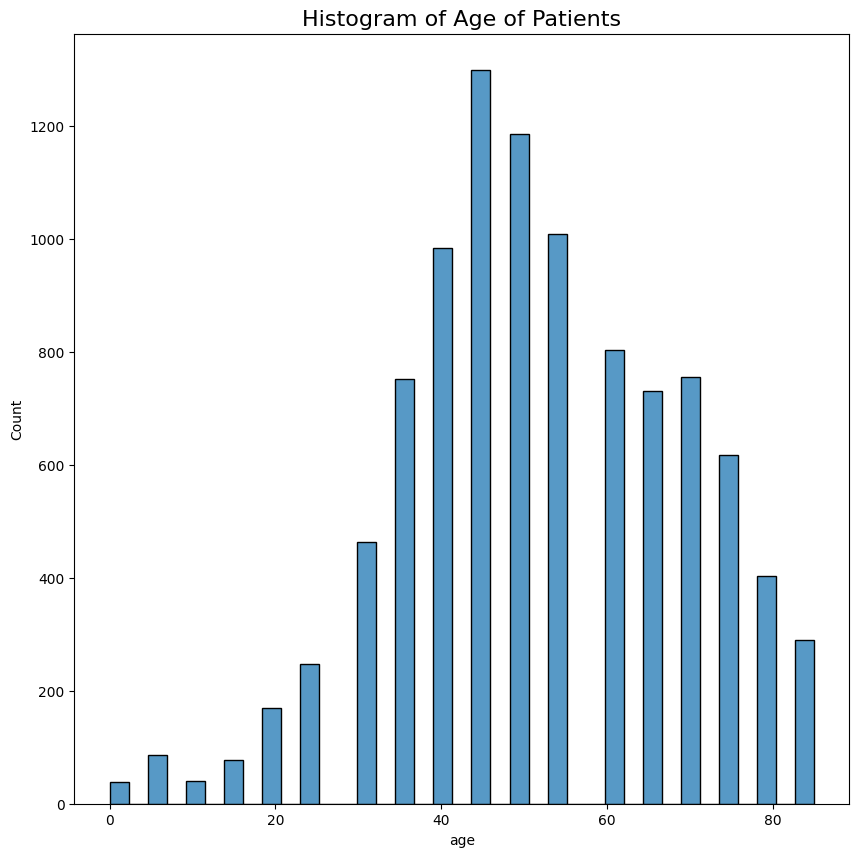

In [29]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

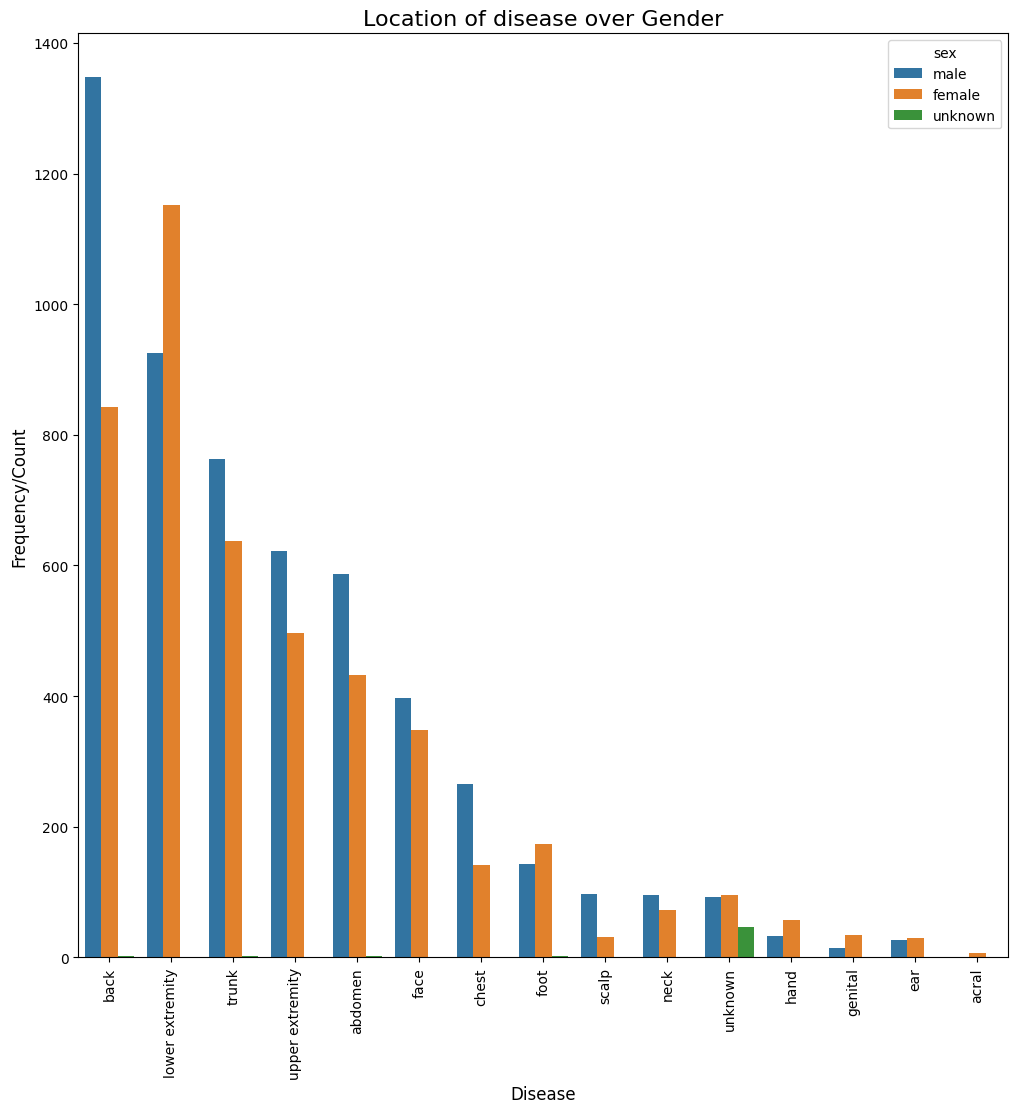

In [30]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [31]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [32]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


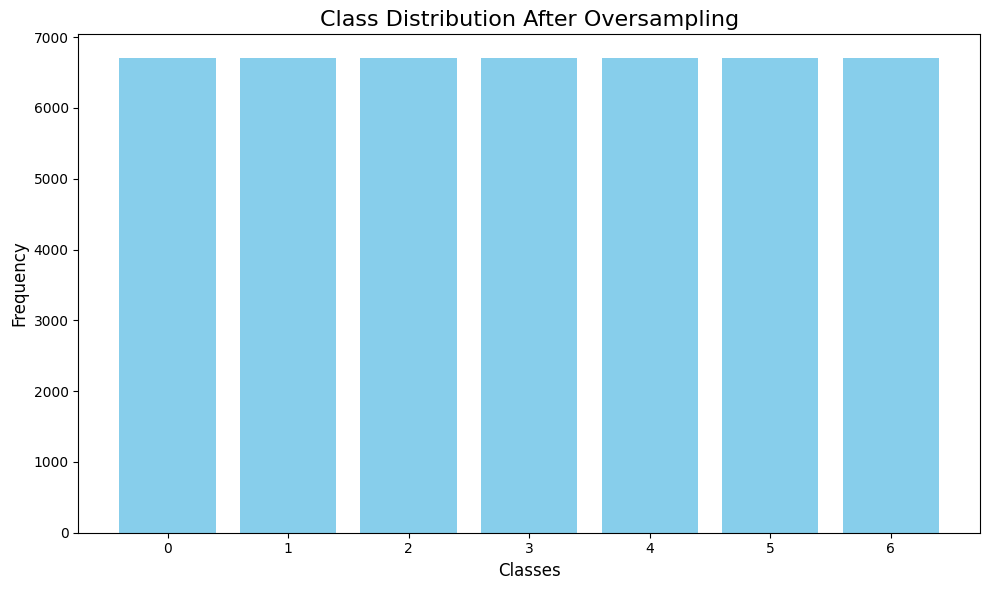

In [33]:
resampled_counts = pd.Series(y).value_counts().sort_index()

# Create a bar chart to visualize the class distribution after oversampling
plt.figure(figsize=(10, 6))
plt.bar(resampled_counts.index, resampled_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Class Distribution After Oversampling", fontsize=16)
plt.xticks(resampled_counts.index, fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

# Standardization and Splitting Data

In [34]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


# Model Training

In [35]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.weights.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1, save_weights_only=True)


In [37]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20

Epoch 1: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.4258 - loss: 1.4539 - val_accuracy: 0.7031 - val_loss: 0.8269
Epoch 2/20

Epoch 2: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7310 - loss: 0.7345 - val_accuracy: 0.7952 - val_loss: 0.5637
Epoch 3/20

Epoch 3: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8366 - loss: 0.4475 - val_accuracy: 0.8615 - val_loss: 0.3644
Epoch 4/20

Epoch 4: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8889 - loss: 0.3031 - val_accuracy: 0.8944 - val_loss: 0.2832
Epoch 5/20

Epoch 5: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9235 - loss: 0.2148 - val_accuracy: 0.9157 - val_loss: 0.2384
Epoch 6/20

Epoch 6: saving model to best_model.weights.h5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0

# Plot Accuracy and Loss

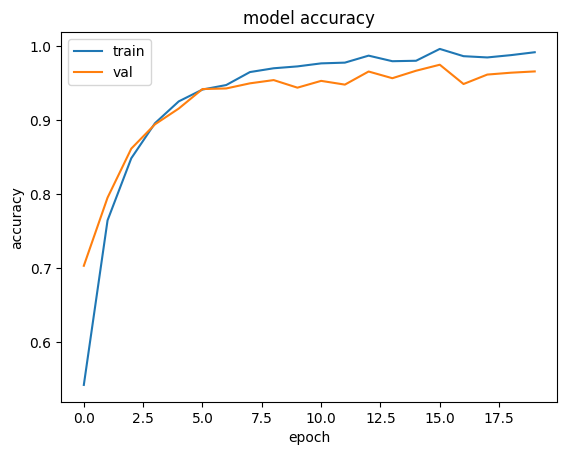

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

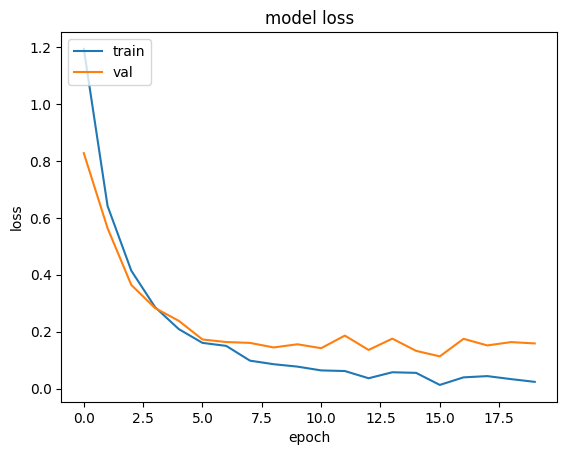

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
model.load_weights('best_model.weights.h5')


# Model Testing

In [41]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 2s - 7ms/step - accuracy: 0.9637 - loss: 0.1893


294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


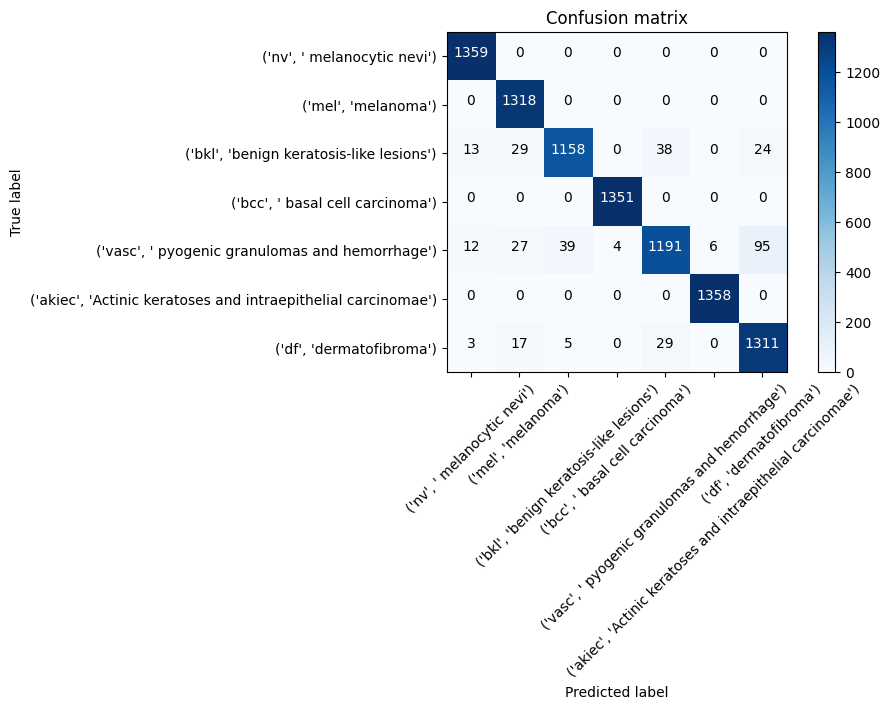

In [42]:
import itertools
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize = (10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes.values()) 

# Model Inference

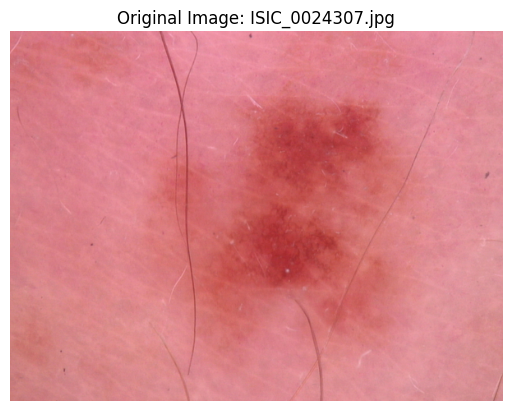

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


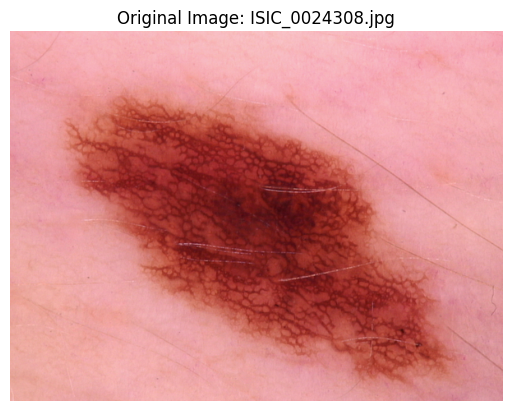

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


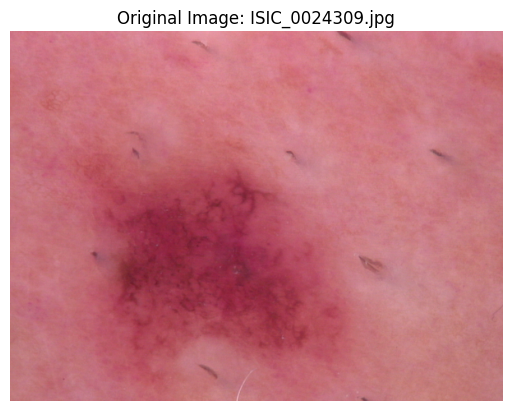

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


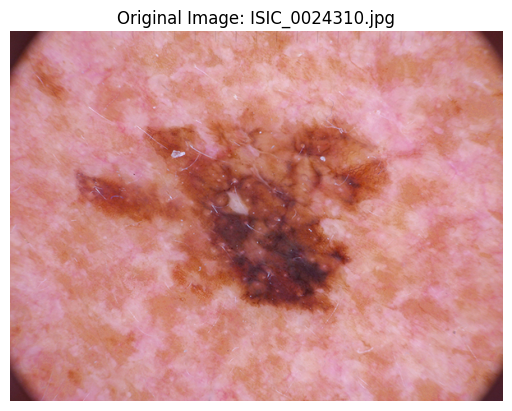

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 99.61%


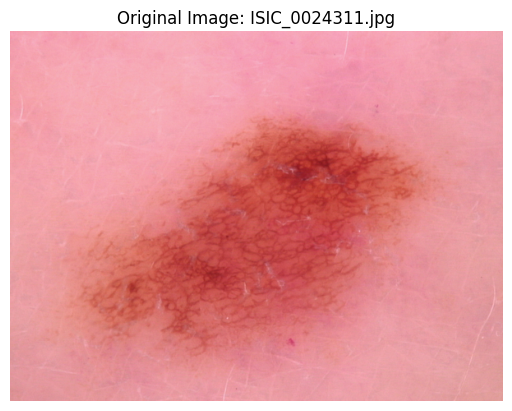

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: ('bcc', ' basal cell carcinoma'), Confidence: 100.00%


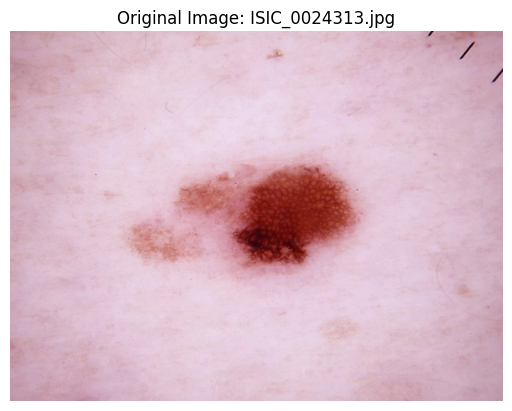

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


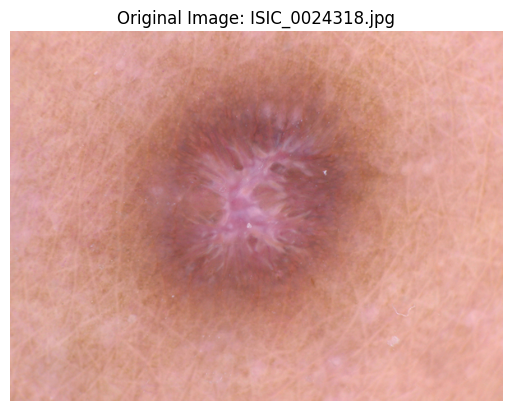

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


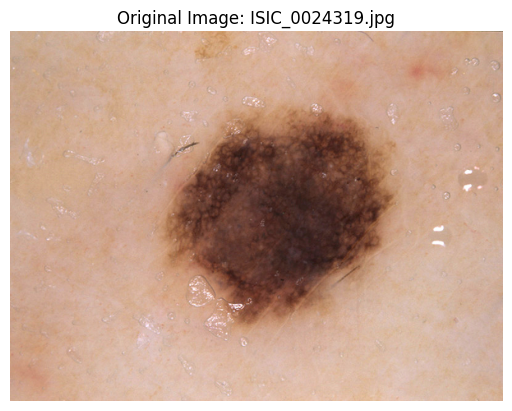

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


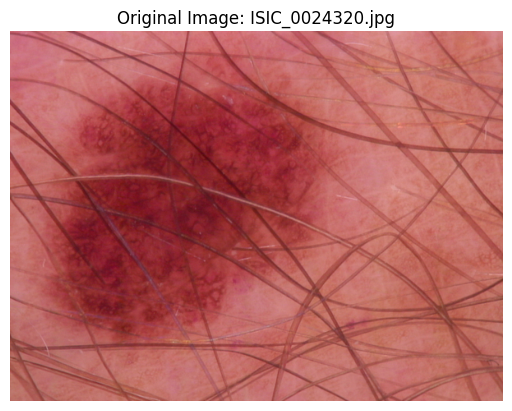

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


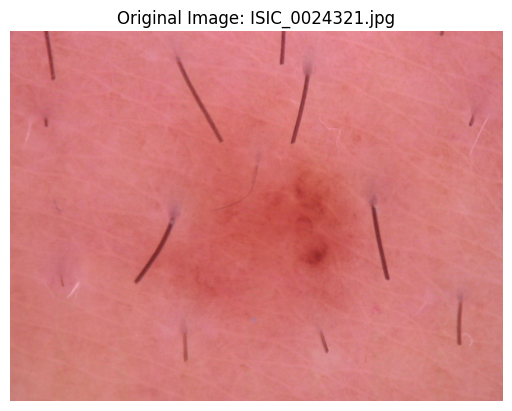

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


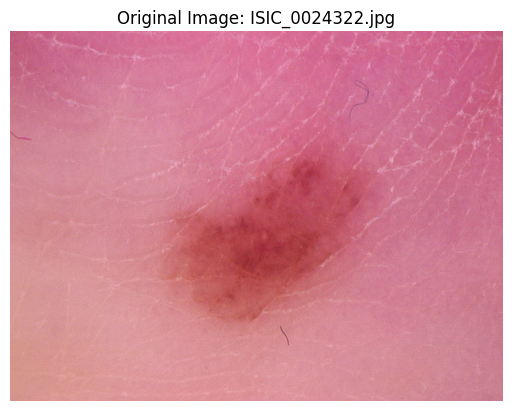

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: ('nv', ' melanocytic nevi'), Confidence: 100.00%


In [44]:
import matplotlib.pyplot as plt
import cv2
import os

srcdir = 'C:/Users/User/Desktop/Streamlit Web App/HAM10000_images_part_1'
count = 0

for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
    plt.imshow(img_rgb)
    plt.title(f"Original Image: {temp}")
    plt.axis('off')
    plt.show()

    # Preprocess and normalize image
    img_resized = cv2.resize(img_rgb, (28, 28))  # Resize image to 28x28
    img_normalized = (img_resized - np.mean(x)) / np.std(x)  # Normalize like training data
    
    # Predict using the trained model
    result = model.predict(img_normalized.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = np.argmax(result[0])
    class_name = classes[class_ind]
    
    # Display prediction
    print(f"Prediction: {class_name}, Confidence: {max_prob * 100:.2f}%")
    count += 1
    if count > 10:
        break
